# Task 1: Investigate and Analyze Price Data

### Getting Workspace Ready

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Loading data 
prices = pd.read_csv("Nat_Gas.csv")
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [3]:
# Change Dates column into datetime object
prices["Dates"] = pd.to_datetime(prices["Dates"], format = "%m/%d/%y")
prices.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


### Analyzing Natural Gas Price Data

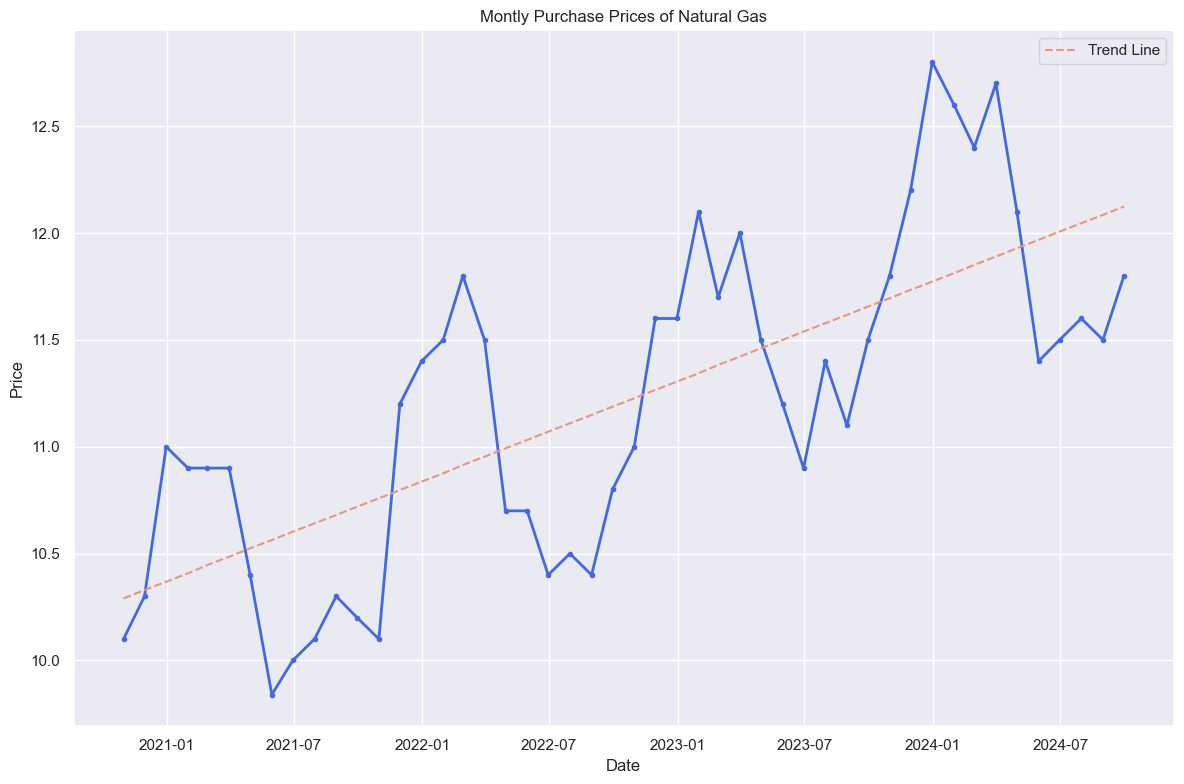

In [4]:
# Plotting Natural Gas Price Data
sns.set_theme()
plt.figure(figsize = (12, 8))
plt.plot(prices["Dates"], prices["Prices"], color = "royalblue", lw = 2, marker = ".")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Montly Purchase Prices of Natural Gas")

# Adding a best-fit line
dates_num = np.arange(len(prices["Dates"]))
slope, intercept, r_value, p_value, std_error = stats.linregress(dates_num, prices["Prices"])
regression_line = slope * dates_num + intercept
plt.plot(prices["Dates"], regression_line, color = "darksalmon", linestyle = "--", label = "Trend Line")
plt.legend()
plt.tight_layout()

From the above plot it is clear to see that the prices of natural gas contracts has a general uptrend from 2021 to 2024. Despite the overall trend though, there is quite a bit of variation as there have been consistent falls and rises throughout. A noticeable distinction can be made on the seasonal trends, where prices seem to decrease in the summer months, while increasing in the winter months. This may be due to the demand for winter heating, which drives the prices up, while in the summer there would be less of this, which would drive the prices down. Moreover due to this variance in demand, natural gas may be stored during the low-demand periods to ensure high demand is met in the high-demand periods. Accordingly, a surplus in storage may lead to lower prices, while a deficit could cause an increase.

Given the small sample data size of 48 rows and the ideal need to capture seasonality, advanced time series techniques may be the best way to forecast future data. 

In [5]:
# Setting date column as index
prices = prices.set_index("Dates").asfreq("M")

In [6]:
# Fitting exponential smoothing model
model = ExponentialSmoothing(prices["Prices"], trend = "add", seasonal = "mul", seasonal_periods = 12)
model_fit = model.fit()

In [7]:
# Forecast future prices
def estimate_price_for_date(target_date, model_fit, forecast_steps = 1):
    forecast = model_fit.forecast(steps = forecast_steps)
    return forecast

In [8]:
# Forecast of following 12 months
target_date = pd.to_datetime("2024-10-31")
next_12 = estimate_price_for_date(target_date, model_fit, forecast_steps = 12)
next_12

2024-10-31    12.081977
2024-11-30    12.721070
2024-12-31    13.131818
2025-01-31    13.210642
2025-02-28    13.112367
2025-03-31    13.200792
2025-04-30    12.524887
2025-05-31    12.079191
2025-06-30    11.978112
2025-07-31    12.198942
2025-08-31    12.103028
2025-09-30    12.384812
Freq: M, dtype: float64

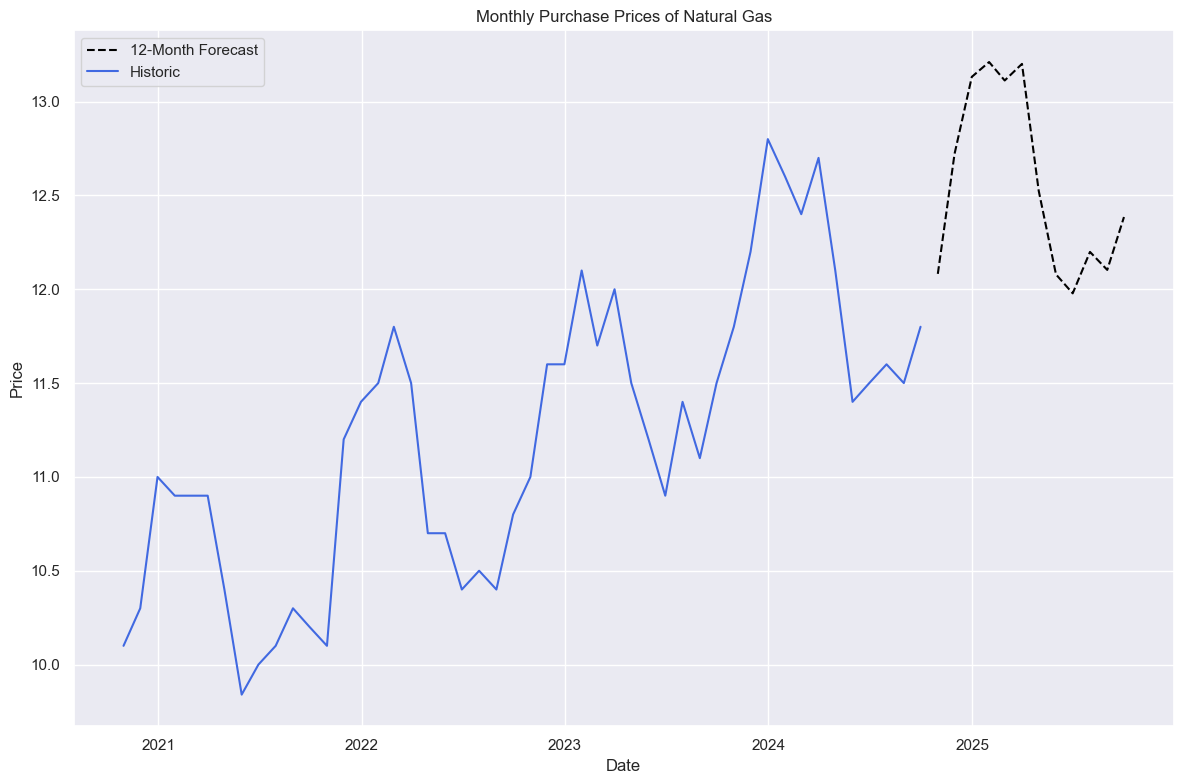

In [9]:
plt.figure(figsize = (12, 8))
plt.plot(next_12, color = "black", linestyle = "--", label = "12-Month Forecast")
plt.plot(prices.index, prices["Prices"], color = "royalblue", label = "Historic")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Monthly Purchase Prices of Natural Gas")
plt.legend()
plt.tight_layout()

The above plot shows the addition of the 12-month forecast, calculated by using a time series modeling technique known as Holt-Winters exponential smoothing. The model was able to capture the general historic uptrend, while also representing the seasonal changes well. We can see that both the local peaks and troughs for each year seem to be increasing by about 0.5 in price and this trend continues. This model shows a more accurate and robust forecast compared to something like a simple linear regression, which was used to show the trend-line in the previous graph.